In [ ]:
"""
Gradient Boosting Regression on the Energy Efficiency Dataset

This script demonstrates an end-to-end workflow for regression using Gradient Boosting to predict the
Heating Load (y1) of buildings from the Energy Efficiency dataset (sourced from UCI/Kaggle).
The dataset comprises 768 samples and 8 features (x1 to x8) along with two responses (y1: Heating Load, y2: Cooling Load).
In this example, we use the eight features to predict y1.

The pipeline includes:
  - Data loading and renaming columns for clarity
  - Data preprocessing (scaling and splitting)
  - Model training using GradientBoostingRegressor
  - Evaluation using R² and Mean Squared Error (MSE)
  - A suite of fresh, appealing visualizations:
       • Scatter Plot of Actual vs. Predicted Heating Load
       • Histogram of Residuals
       • Line Plot of Sorted Actual vs. Predicted Values
       • Feature Importance Bar Chart
       • Partial Dependence Plot for Relative Compactness (x1)

"""

# ---------------------------------
# Step 1: Import Required Libraries
# ---------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
# ---------------------------------
# Step 2: Set a New Visualization Style
# ---------------------------------
plt.style.use("seaborn-v0_8-dark-palette")
sns.set_theme(style="darkgrid", palette="muted")


In [ ]:
# ---------------------------------
# Step 3: Load the Energy Efficiency Dataset
# ---------------------------------
# Assume the dataset "energy_efficiency.csv" is available in the working directory.
# The original dataset has 768 samples and 10 columns: x1 to x8, y1, y2.
df = pd.read_csv("/content/ENB2012_data.csv")

In [ ]:
# Rename columns for clarity based on UCI attribute information:
# x1: Relative Compactness
# x2: Surface Area
# x3: Wall Area
# x4: Roof Area
# x5: Overall Height
# x6: Orientation
# x7: Glazing Area
# x8: Glazing Area Distribution
# y1: Heating Load, y2: Cooling Load
df.columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
              "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution",
              "Heating Load", "Cooling Load"]

print("Dataset shape:", df.shape)
print("First 5 rows:\n")
df.head()

Dataset shape: (768, 10)
First 5 rows:



,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# ---------------------------------
# Step 4: Data Preprocessing
# ---------------------------------
# We will predict "Heating Load" (y1) using the 8 features.
features = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
            "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution"]
target = "Heating Load"

X = df[features]
y = df[target]

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

In [ ]:
# ---------------------------------
# Step 5: Split Data into Training and Testing Sets
# ---------------------------------
# Use a 70/30 split for unbiased evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (537, 8)
Testing set shape: (231, 8)


In [ ]:
# ---------------------------------
# Step 6: Train the Gradient Boosting Regressor
# ---------------------------------
# Initialize GradientBoostingRegressor with tuned hyperparameters
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [ ]:
# ---------------------------------
# Step 7: Evaluate the Model
# ---------------------------------
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("\nR² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.9981044274918301
Mean Squared Error: 0.19220502682984597


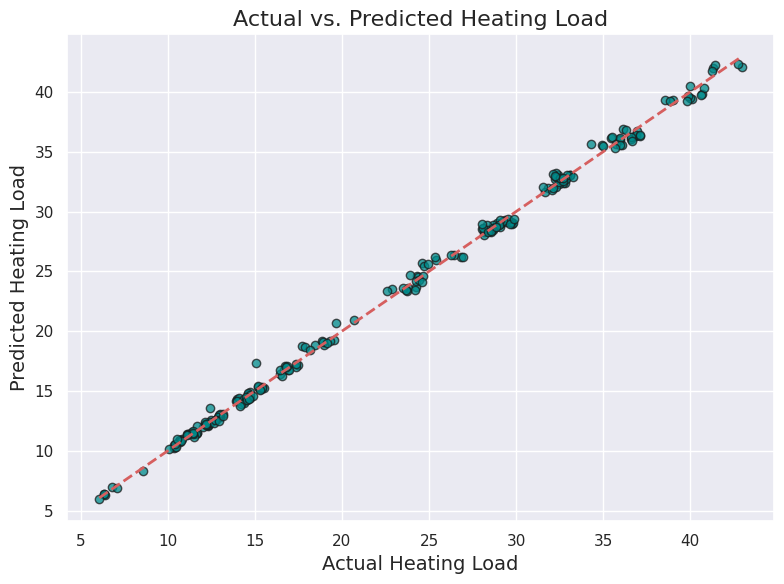

In [ ]:
# ---------------------------------
# Step 8: Visualization - Scatter Plot of Actual vs. Predicted Heating Load
# ---------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="darkcyan", edgecolor="k", alpha=0.75)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Heating Load", fontsize=14)
plt.ylabel("Predicted Heating Load", fontsize=14)
plt.title("Actual vs. Predicted Heating Load", fontsize=16)
plt.tight_layout()
plt.show()


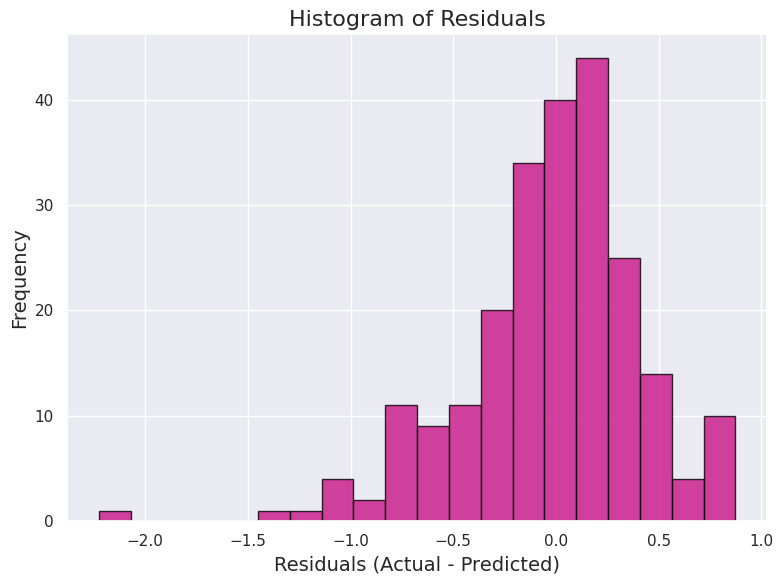

In [ ]:
# ---------------------------------
# Step 9: Visualization - Histogram of Residuals
# ---------------------------------
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=20, color="mediumvioletred", edgecolor="black", alpha=0.8)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histogram of Residuals", fontsize=16)
plt.tight_layout()
plt.show()

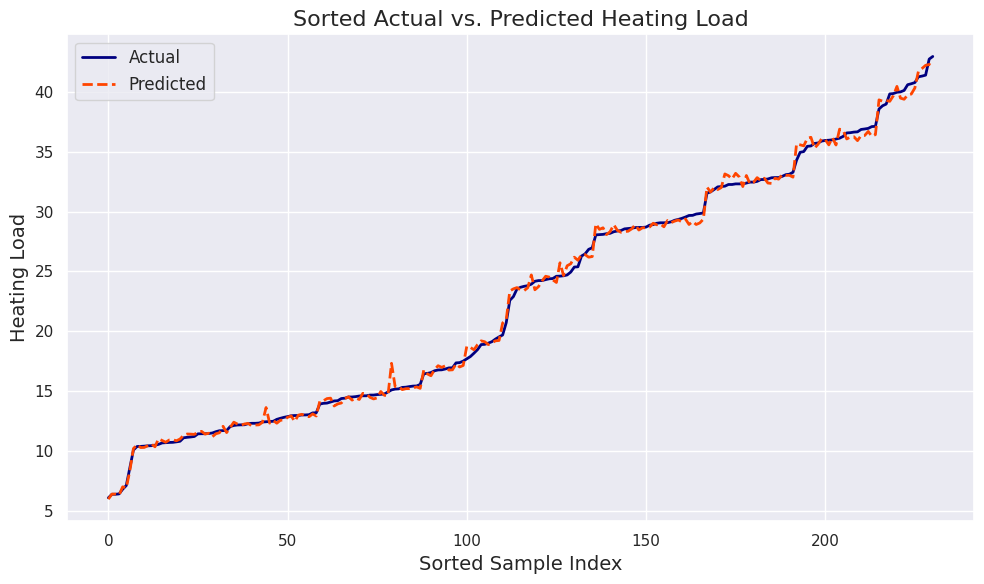

In [ ]:
# ---------------------------------
# Step 10: Visualization - Line Plot of Sorted Actual vs. Predicted Values
# ---------------------------------
sorted_idx = np.argsort(y_test.values)
plt.figure(figsize=(10,6))
plt.plot(y_test.values[sorted_idx], label="Actual", color="navy", linewidth=2)
plt.plot(np.array(y_pred)[sorted_idx], label="Predicted", color="orangered", linestyle="--", linewidth=2)
plt.xlabel("Sorted Sample Index", fontsize=14)
plt.ylabel("Heating Load", fontsize=14)
plt.title("Sorted Actual vs. Predicted Heating Load", fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

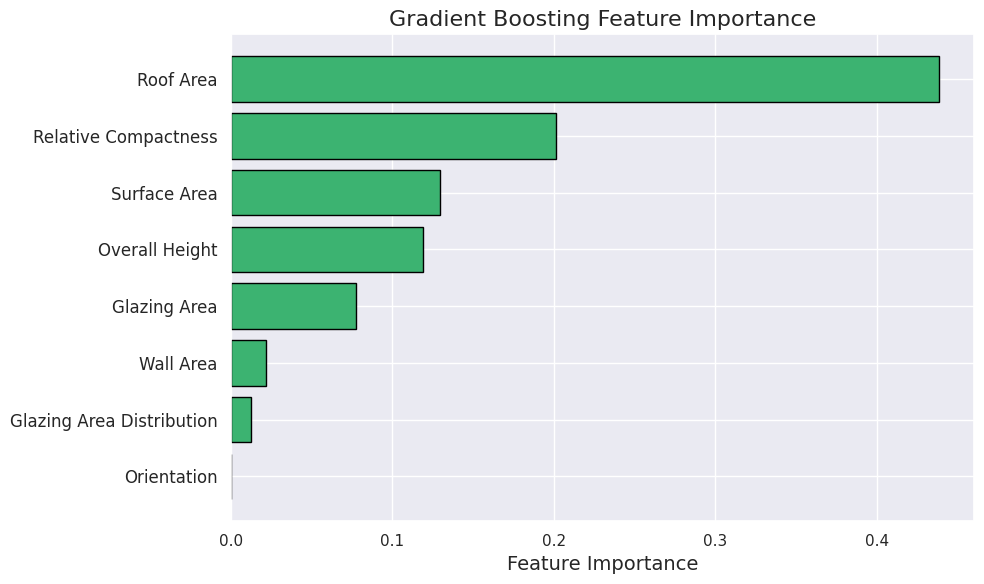

In [ ]:
# ---------------------------------
# Step 11: Visualization - Feature Importance Bar Chart
# ---------------------------------
importances = gbr.feature_importances_
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], color="mediumseagreen", edgecolor="black")
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices], fontsize=12)
plt.xlabel("Feature Importance", fontsize=14)
plt.title("Gradient Boosting Feature Importance", fontsize=16)
plt.tight_layout()
plt.show()


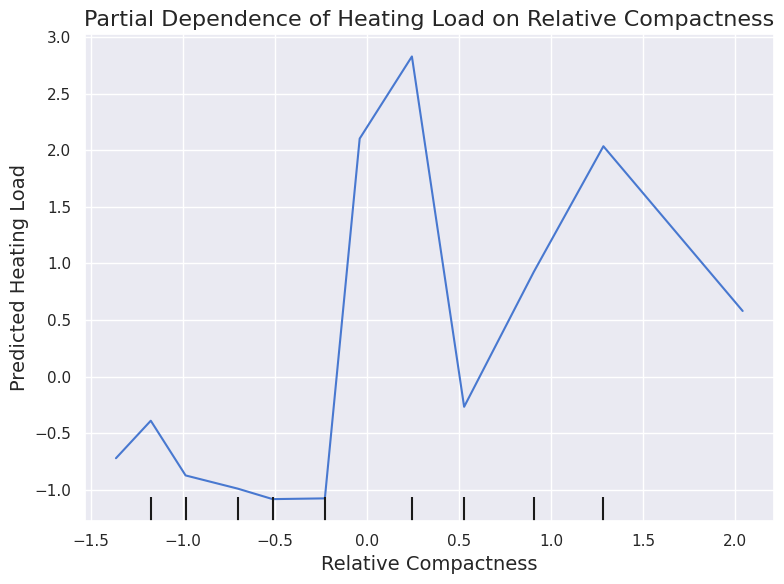

In [ ]:
# ---------------------------------
# Step 12: Visualization - Partial Dependence Plot for 'Relative Compactness'
# ---------------------------------
fig, ax = plt.subplots(figsize=(8,6))
PartialDependenceDisplay.from_estimator(gbr, X_train, features=["Relative Compactness"], grid_resolution=50, ax=ax)
plt.title("Partial Dependence of Heating Load on Relative Compactness", fontsize=16)
plt.xlabel("Relative Compactness", fontsize=14)
plt.ylabel("Predicted Heating Load", fontsize=14)
plt.tight_layout()
plt.show()